In [141]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [142]:
# Reading Orders

def order_read(orde):
    order_type = orde['OrderType']
    order_id = orde['OrderID']
    order_char = orde['OrderCharacteristic']
    direction = orde['Direction']
    quantity = orde['Quantity']
    price = orde['Price']
    date = orde['Date']
    trader = orde['Trader']
    
    return {'OrderType':order_type,\
            'OrderID':order_id,\
            'OrderCharacteristic':order_char,\
            'Quantity':quantity,\
            'Price':price,\
            'Date':date,\
            }
    

In [143]:
# Buy and sell order queue

buy_order1={1:6,3:5,5:8,10:9,4:2}
sell_order1={11:6,12:3,14:8,16:9,19:2}
dic_trade={10:2,11:3}

# Retrieve

# Retrieve order

def first(order):
    return list(sorted(order.items()))[0]

def firstn(order,n):
    return dict(list(sorted(order.items()))[:n])

def last(order):
    return list(sorted(order.items()))[-1]

def lastn(order,n):
    return dict(list(sorted(order.items()))[-n:])

def buy(buy_order,sell_order):
    buy_firstB = True
    buy_firstA = True
    try:
        buy_b = last(buy_order)[0]
    except:
        buy_b = 0
        buy_firstB = False
    try:
        buy_a = first(sell_order)[0]
    except:
        buy_a = 0
        buy_firstA = False
    return [buy_b,buy_a,buy_firstB,buy_firstA]

def total(order):
    return sum(order.values())

In [144]:
[first(sell_order1),firstn(sell_order1,2)]

[(11, 6), {11: 6, 12: 3}]

In [145]:
[last(buy_order1),lastn(buy_order1,2)]

[(10, 9), {5: 8, 10: 9}]

In [146]:
buy(buy_order1,sell_order1)

[10, 11, True, True]

In [147]:
buy(buy_order1,{})

[10, 0, True, False]

In [148]:
buy({},sell_order1)

[0, 11, False, True]

In [149]:
total(buy_order1)


30

In [240]:
total(sell_order1)

28

In [256]:
def nonzero_order(order):
    return dict(((k,v) for (k,v) in order.items() if v!=0))

In [257]:
# Dataframes

def order_dataframe(order,orderN,rev = False):
    # rev is a variable that should be False as a default in the Buy Order, it can be used as True for the cumulative queue
    if orderN =='T':
        df = pd.DataFrame.from_dict(order,orient = 'index')
        df.index.name = ['Price']
        try:
            df.columns = ['Qty']
        except:
            pass
        return df
    else:
        if orderN == 'B':
            order_col = 'Qty_Bid'
        else:
            order_col = 'Qty_Ask'
        df = pd.DataFrame(sorted(order.items()),
                columns = ['Price',order_col]).set_index('Price')
        df.sort_index(ascending = not(rev),inplace = True)
        return df
    
def buy_sell_order_dataframe(buy_order,sell_order):
    df_buy_order = order_dataframe(buy_order,'B')
    df_sell_order = order_dataframe(sell_order,'S')
    df_order = pd.concat([df_buy_order, df_sell_order])
    return df_order
    
def buy_sell_order_dataframe1(buy_order,sell_order):
    df_buy_order = order_dataframe(buy_order,'B')
    df_sell_order = order_dataframe(sell_order,'S')
    df_order = pd.concat([df_buy_order, df_sell_order],axis=1)
    return df_order

def buy_sell_orderN_dataframe(buy_order,sell_order,n):
    df_buy_order = order_dataframe(lastn(buy_order,n),'B')
    df_sell_order = order_dataframe(firstn(sell_order,n),'S')
    df_order=pd.concat([df_buy_order,df_sell_order])
    return df_order

def buy_sell_orderN_dataframe1(buy_order,sell_order,n):
    df_buy_order = order_dataframe(lastn(buy_order,n),'B')
    df_sell_order = order_dataframe(firstn(sell_order,n),'S')
    df_order=pd.concat([df_buy_order,df_sell_order],axis=1)
    return df_order

In [258]:
order_dataframe(buy_order1,'B',True)

,Qty_Bid
Price,
10,9
5,8
4,2
3,5
1,6


In [259]:
order_dataframe(sell_order1,'S')

,Qty_Ask
Price,
11,6
12,3
14,8
16,9
19,2


In [260]:
buy_sell_order_dataframe(buy_order1,sell_order1)



C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Qty_Ask,Qty_Bid
Price,,
1,NaN,6.0
3,NaN,5.0
4,NaN,2.0
5,NaN,8.0
10,NaN,9.0
11,6.0,NaN
12,3.0,NaN
14,8.0,NaN
16,9.0,NaN


In [261]:
buy_sell_order_dataframe1(buy_order1,sell_order1)

,Qty_Bid,Qty_Ask
Price,,
1,6.0,NaN
3,5.0,NaN
4,2.0,NaN
5,8.0,NaN
10,9.0,NaN
11,NaN,6.0
12,NaN,3.0
14,NaN,8.0
16,NaN,9.0


In [262]:
buy_sell_orderN_dataframe(buy_order1,sell_order1, 2)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Qty_Ask,Qty_Bid
Price,,
5,NaN,8.0
10,NaN,9.0
11,6.0,NaN
12,3.0,NaN


In [263]:
buy_sell_orderN_dataframe1(buy_order1,sell_order1, 2)

,Qty_Bid,Qty_Ask
Price,,
5,8.0,NaN
10,9.0,NaN
11,NaN,6.0
12,NaN,3.0


In [264]:
order_dataframe({},'S')

,Qty_Ask
Price,


In [265]:
order_dataframe(dic_trade,'T')

,Qty
[Price],
10,2
11,3


In [266]:
order_dataframe({},'T')

""
[Price]


In [267]:
def order_dataframe_Ni(order,orderN,discount,ts):
    df_order=order_dataframe(order,orderN)
    df_order.reset_index(inplace=True)
    df_order['Discount']=discount
    df_order['Ts']=ts
    return df_order

def buy_sell_order_dataframe_Ni(buy_order,sell_order,discount,ts):
    df_order=buy_sell_order_dataframe(buy_order,sell_order)
    df_order.reset_index(inplace=True)
    df_order['Discount']=discount
    df_order['Ts']=ts
    return df_order

def buy_sell_orderN_dataframe_Ni(buy_order,sell_order,n,discount,ts):
    df_order=buy_sell_orderN_dataframe(buy_order,sell_order,n)
    df_order.reset_index(inplace=True)
    df_order['Discount']=discount
    df_order['Ts']=ts
    return df_order

In [268]:
order_dataframe_Ni(buy_order1,'B',1,2)

,Price,Qty_Bid,Discount,Ts
0,1,6,1,2
1,3,5,1,2
2,4,2,1,2
3,5,8,1,2
4,10,9,1,2


In [269]:
order_dataframe_Ni(sell_order1,'S',1,2)

,Price,Qty_Ask,Discount,Ts
0,11,6,1,2
1,12,3,1,2
2,14,8,1,2
3,16,9,1,2
4,19,2,1,2


In [270]:
buy_sell_order_dataframe_Ni(buy_order1,sell_order1,1,2)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Price,Qty_Ask,Qty_Bid,Discount,Ts
0,1,NaN,6.0,1,2
1,3,NaN,5.0,1,2
2,4,NaN,2.0,1,2
3,5,NaN,8.0,1,2
4,10,NaN,9.0,1,2
5,11,6.0,NaN,1,2
6,12,3.0,NaN,1,2
7,14,8.0,NaN,1,2
8,16,9.0,NaN,1,2
9,19,2.0,NaN,1,2


In [271]:
buy_sell_orderN_dataframe_Ni(buy_order1,sell_order1,2,10,20)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Price,Qty_Ask,Qty_Bid,Discount,Ts
0,5,NaN,8.0,10,20
1,10,NaN,9.0,10,20
2,11,6.0,NaN,10,20
3,12,3.0,NaN,10,20


In [272]:
def df_order_sell(df):
    buy_order = df['Qty_Bid'].dropna().to_dict()
    sell_order = df['Qty_Ask'].dropna().to_dict()
    return [buy_order,sell_order]

def full_df_order_sell(df):
    dfi=df.copy().set_index('Price')
    return df_order_sell(dfi)

In [273]:
df_order_sell(pd.concat([order_dataframe(buy_order1,'B'),order_dataframe(sell_order1,'S')]))

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


[{1: 6.0, 3: 5.0, 4: 2.0, 5: 8.0, 10: 9.0},
 {11: 6.0, 12: 3.0, 14: 8.0, 16: 9.0, 19: 2.0}]

In [274]:
pd.concat([order_dataframe(buy_order1,'B'),order_dataframe(sell_order1,'S')]).reset_index()

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Price,Qty_Ask,Qty_Bid
0,1,NaN,6.0
1,3,NaN,5.0
2,4,NaN,2.0
3,5,NaN,8.0
4,10,NaN,9.0
5,11,6.0,NaN
6,12,3.0,NaN
7,14,8.0,NaN
8,16,9.0,NaN
9,19,2.0,NaN


In [275]:
full_df_order_sell(pd.concat([order_dataframe(buy_order1,'B'),order_dataframe(sell_order1,'S')]).reset_index())

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


[{1: 6.0, 3: 5.0, 4: 2.0, 5: 8.0, 10: 9.0},
 {11: 6.0, 12: 3.0, 14: 8.0, 16: 9.0, 19: 2.0}]

In [276]:
def cumm(order,orderN):
    if orderN == 'B':
        df_order = order_dataframe(order,orderN,True)
        order_col='Qty_Bid'
    elif orderN == 'S':
        df_order = order_dataframe(order,orderN,False)
        order_col='Qty_Ask'
    else:
        df_order=order_dataframe(order,orderN,False)
        order_col='Qty'
    return df_order.cumsum().to_dict()[order_col]

def df_cumm_buy_sell_order(buy_order,sell_order):
    return buy_sell_order_dataframe(cumm(buy_order,'B'),cumm(sell_order,'S'))

def df_cumm_buy_sell_order1(buy_order,sell_order):
    return buy_sell_order_dataframe1(cumm(buy_order,'B'),cumm(sell_order,'S'))

def df_cumm_buy_sell_orderN(buy_order,sell_order,n):
    return buy_sell_orderN_dataframe(cumm(buy_order,'B'),cumm(sell_order,'S'),n)

In [277]:
cumm(buy_order1,'B')

{10: 9, 5: 17, 4: 19, 3: 24, 1: 30}

In [278]:
cumm(sell_order1,'S')

{11: 6, 12: 9, 14: 17, 16: 26, 19: 28}

In [279]:
cumm(dic_trade,'T')

{10: 2, 11: 5}

In [280]:
df_cumm_buy_sell_order(buy_order1,sell_order1)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Qty_Ask,Qty_Bid
Price,,
1,NaN,30.0
3,NaN,24.0
4,NaN,19.0
5,NaN,17.0
10,NaN,9.0
11,6.0,NaN
12,9.0,NaN
14,17.0,NaN
16,26.0,NaN


In [281]:
df_cumm_buy_sell_order1(buy_order1,sell_order1)

,Qty_Bid,Qty_Ask
Price,,
1,30.0,NaN
3,24.0,NaN
4,19.0,NaN
5,17.0,NaN
10,9.0,NaN
11,NaN,6.0
12,NaN,9.0
14,NaN,17.0
16,NaN,26.0


In [282]:
df_cumm_buy_sell_orderN(buy_order1,sell_order1,3)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Qty_Ask,Qty_Bid
Price,,
4,NaN,19.0
5,NaN,17.0
10,NaN,9.0
11,6.0,NaN
12,9.0,NaN
14,17.0,NaN


In [283]:
def plot_order(buy_order,sell_order):
    buy_sell_order_dataframe1(buy_order,sell_order).plot(kind='bar',color=['red','blue'],\
         title='Bid/Ask Queue');
    plt.axhline(0,color='black');

def plot_orderN(buy_order,sell_order,n):
    buy_sell_orderN_dataframe1(buy_order,sell_order,n).plot(kind='bar',color=['red','blue'],\
         title='Bid/Ask Queue');
    plt.axhline(0,color='black');

def plot_df(df):
    df.plot(kind='bar',color=['red','blue'],\
         title='Bid/Ask Queue');
    plt.axhline(0,color='black');

def plot_cumm(buy_order,sell_order):
    df_cumm_buy_sell_order1(buy_order,sell_order).plot(kind='bar',color=['red','blue'],\
            title='Cumulative Bid/Ask Queue');
    plt.axhline(0,color='black');
    
def plot_cummN(buy_order,sell_order,n):
    df_cumm_buy_sell_orderN(buy_order,sell_order,n).plot(kind='bar',color=['red','blue'],\
            title='Cumulative Bid/Ask Queue');
    plt.axhline(0,color='black');

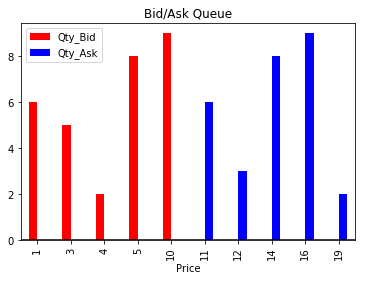

In [284]:
plot_order(buy_order1,sell_order1)

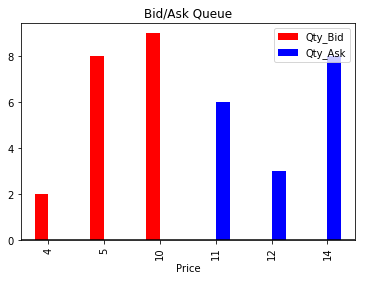

In [285]:
plot_orderN(buy_order1,sell_order1,3)

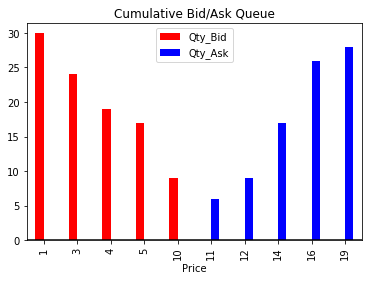

In [286]:
plot_cumm(buy_order1,sell_order1)

C:\Users\Shikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



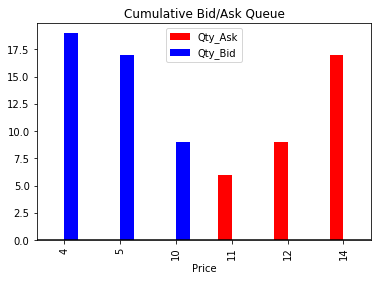

In [287]:
plot_cummN(buy_order1,sell_order1,3)

In [355]:
# Test Orders

orderLBa={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'L','Price': 98,
          'Quantity': 100,'Trader':1,}

In [356]:
orderLBm={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'L','Price': 102,
          'Quantity': 100,'Trader':1,}

In [357]:
orderLBmt={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'L','Price': 102,
           'Quantity': 40,'Trader':1,}

In [358]:
orderLSa={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'L','Price': 102,
          'Quantity': 100,'Trader':1,}

In [359]:
orderLSm={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'L','Price': 98,
          'Quantity': 100,'Trader':1,}

In [360]:
orderLSmt={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'L','Price': 98,
           'Quantity': 40,'Trader':1,}

In [361]:
orderMB={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'M','Price': 0,
         'Quantity': 65,'Trader':1,}

In [362]:
orderMS={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'M','Price': 0,
         'Quantity': 65,'Trader':1,}

In [363]:
orderMBt={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'M','Price': 0,
         'Quantity': 120,'Trader':1,}

In [364]:
orderMSt={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'M','Price': 0,
         'Quantity': 120,'Trader':1,}

In [365]:
orderCBT={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'C','Price': 98,
         'Quantity': 35,'Trader':1,}

In [366]:
orderCBF1={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'C','Price': 99,
         'Quantity': 35,'Trader':1,}

In [367]:
orderCBF2={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'B','OrderType': 'C','Price': 90,
         'Quantity': 35,'Trader':1,}

In [368]:
orderCST={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'C','Price': 103,
         'Quantity': 35,'Trader':1,}

In [369]:
orderCST1={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'C','Price': 102,
         'Quantity': 35,'Trader':1,}

In [370]:
orderCST2={'Date': '2018-03-01','OrderID':1,'OrderCharacteristic':1,'Direction': 'S','OrderType': 'C','Price': 110,
         'Quantity': 35,'Trader':1,}

In [371]:
orderlist=['orderLBa','orderLBm','orderLBmt',\
           'orderLSa','orderLSm','orderLSmt',\
           'orderMB','orderMBt',\
           'orderMS','orderMSt',\
           'orderCBT','orderCBF1','orderCBF2',\
           'orderCST','orderCSF1','orderCSF2']

In [372]:
def summ(orde):
    return [orde['OrderType'],orde['Direction'],{orde['Price']:orde['Quantity']}]

In [373]:
def add_dict(order,x):
    new_order=order.copy()
    try:
        new_order[x['Price']]+=x['Quantity']
    except:
        new_order[x['Price']]=x['Quantity']
    return [new_order,True]

In [374]:
def subtract_dict(order,x):
    new_order=order.copy()
    cncl=True
    try:
        new_order[x['Price']]-=x['Quantity']
    except:
        cncl=False
    try:
        if new_order[x['Price']]<0:
            cncl=False
            new_order=order.copy()
    except:
        pass
    return [new_order,cncl]

In [375]:
def add_cancel(order,x):
    if x['OrderType']=='C':
        return subtract_dict(order,x)
    else:
        return add_dict(order,x)

In [376]:
def buy_sell_add_cancel(buy_order,sell_order,x):
    new_buy_order=buy_order.copy()
    new_sell_order=sell_order.copy()
    if x['Direction']=='B':
        new_buy_order, cncl = add_cancel(new_buy_order,x)
    else:
        new_sell_order, cncl = add_cancel(new_sell_order,x)
    if cncl:
        pro={}
    else:
        pro=x.copy()
    return [new_buy_order,new_sell_order,{},pro,cncl]

In [377]:
def sel_order_qty(order,orderN,quantity):
    order_c=cumm(order,orderN)
    order_sel=dict([(p,order[p]) for (p,v) in order_c.items() if v>=quantity])
    dic_trade=dict([(p,q[p]) for (p,v) in order_c.items() if v<quantity])
    order_re=quantity-total(dic_trade)
    if order_re > 0:
        if orderN =='B':
            bb,ba,buy_firstB,buy_firstA=buy(order_sel,{})
            buy_firstF=buy_firstB
            bp=bb
        else:
            bb,ba,buy_firstB,buy_firstA=buy({},order_sel)
            buy_firstF=buy_firstA
            bp=ba
        if (buy_firstF and (order_sel[bp]>=order_re)):
            dic_trade[bp]=order_re
            order_sel[bp]-=order_re
    return [order_sel,dic_trade]

In [378]:
def sel_order_px(order,orderN,px):
    if orderN == 'B':
        s=+1
    else:
        s=-1
    order_sel=dict([(p,order[p]) for (p,v) in order.items() if s*p<s*px])
    dic_trade=dict([(p,order[p]) for (p,v) in order.items() if s*p>=s*px])
    return [order_sel,dic_trade]

In [379]:
def buy_sell_match(buy_order,sell_order,x):
    # Initialize answers
    new_buy_order=buy_order.copy()
    new_sell_order=sell_order.copy()
    dic_trade={}
    pro=x.copy()
    # Get order information
    order_type=x['OrderType']=='M'
    quantity=x['Quantity']
    price=x['Price']
    direction=x['Direction']=='B'
    # If OrderType is M, do not filter by price
    if order_type:
        if direction:
            price=1000000000
        else:
            price=0
    # Filter relevant queue by price
    # rq1 is the remaining queue (not tradable)
    # uq is the tradable queue
    if direction:
        r_order1,u_order=sel_order_px(sell_order,'S',price)
    else:
        r_order1,u_order=sel_order_px(buy_order,'B',price)
    # Total available on filtered queue
    u_orderT=total(u_order)
    if quantity>=u_orderT:
        # Shortcut if order amount greater than total available
        dic_trade=u_order.copy()
        if quantity==u_orderT:
            pro={}
        else:
            pro['Quantity']=quantity-u_orderT
        r_order2={}
        if direction:
            new_sell_order={**r_order1, **r_order2}
        else:
            new_buy_order={**r_order1, **r_order2}
    else:
        # Break filtered queue into remaining and traded
        if direction:
            r_order2, dic_trade= sel_order_quantity(new_sell_order,'S',quantity)
            new_sell_queue={**r_order1, **r_order2}
        else:
            r_order2, dic_trade= sel_order_quantity(new_buy_order,'B',quantity)
            new_buy_order={**r_order1, **r_order2}
        pro={}
    if ((pro!={}) and not(order_type)):
        new_buy_order,new_sell_order,aux1,pro,aux2=buy_sell_add_cancel(new_buy_order,new_sell_order,pro)
    return [new_buy_order,new_sell_order,dic_trade,pro,pro=={}]

In [395]:
def pro_order(buy_order,sell_order,do,status):
    new_buy_order=buy_order.copy()
    new_sell_order=sell_order.copy()
    if status=='PM':
        new_buy_order, new_sell_order, dic_trade, pro, cncl = buy_sell_add_cancel(new_buy_order,new_sell_order,do)
    elif status=='OA':
        pass
    else:
        if do['OrderType']=='M':
            new_buy_order, new_sell_order, dic_trade, pro, cncl = buy_sell_match(new_buy_order,new_sell_order,do)
        else:
            if do['OrderType']=='L':
                bb,ba,buy_firstB,buy_firstA=buy(buy_order,sell_order)
                lbf=(do['Direction']=='B') and \
                    (do['Price']>=ba) and buy_firstA
                lsf=(do['Direction']=='S') and \
                    (do['Price']<=bb) and buy_firstB
                if (lbf or lsf):
                    new_buy_order,new_sell_order, dic_trade, pro, cncl = buy_sell_match(new_buy_order,new_sell_order,do)
                else:
                    new_buy_order,new_sell_order, dic_trade, pro, cncl = buy_sell_add_cancel(new_buy_order,new_sell_order,do)
            else:
                new_buy_order,new_sell_order, dic_trade, pro, cncl = buy_sell_add_cancel(new_buy_order,new_sell_order,do)
    # Returns:
    # nbq: New buy queue
    # nsq: New sell queue
    # dic_trade: Dict of trades (price:quantity)
    # pro: Remaining non-placed-in-queue market order
    # cncl: True if no problems in processing order
    # cncl: False if a cancel was not possible or 
    #     there is a market order failed to execute
    #     totally against the opposite queue
    return [nonzero_order(new_buy_order),nonzero_order(new_sell_order),dic_trade,pro,cncl]

In [381]:
# Testing order list

orderlist

['orderLBa',
 'orderLBm',
 'orderLBmt',
 'orderLSa',
 'orderLSm',
 'orderLSmt',
 'orderMB',
 'orderMBt',
 'orderMS',
 'orderMSt',
 'orderCBT',
 'orderCBF1',
 'orderCBF2',
 'orderCST',
 'orderCSF1',
 'orderCSF2']

In [382]:
# Adding to Order (Non-Crossing)

# Pre Matching

[buy_order1,sell_order1,summ(orderLBa),pro_order(buy_order1,sell_order1,orderLBa,'PM'),
 buy_order1,sell_order1,summ(orderLSa),pro_order(buy_order1,sell_order1,orderLSa,'PM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'B', {98: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2, 98: 100},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {},
  True],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'S', {102: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2, 102: 100},
  {},
  {},
  True]]

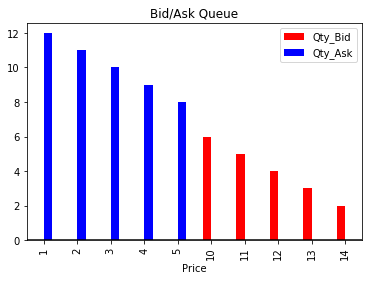

In [383]:
plot_order({10:6,11:5,12:4,13:3,14:2},
           {1:12,2:11,3:10,4:9,5:8})

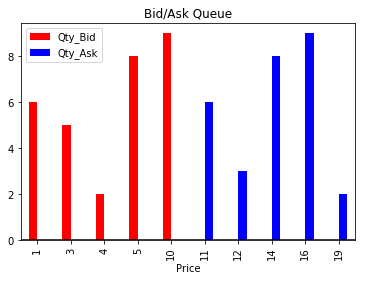

In [384]:
plot_order(buy_order1,sell_order1)

In [385]:
# Normal Matching

[buy_order1,sell_order1,summ(orderLBa),pro_order(buy_order1,sell_order1,orderLBa,'NM'),
 buy_order1,sell_order1,summ(orderLSa),pro_order(buy_order1,sell_order1,orderLSa,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'B', {98: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2, 98: 72},
  {},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  True],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'S', {102: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2, 102: 100},
  {},
  {},
  True]]

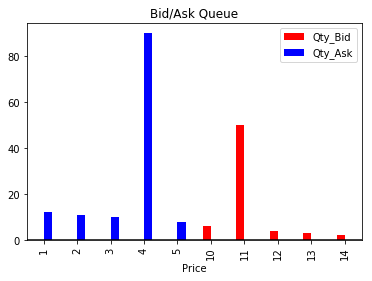

In [386]:
plot_order({10:6,11:50,12:4,13:3,14:2},
           {1:12,2:11,3:10,4:90,5:8})

In [387]:
# Adding to order (Crossing)

# Pre Matching

[buy_order1,sell_order1,summ(orderLBm),pro_order(buy_order1,sell_order1,orderLBm,'PM'),
 buy_order1,sell_order1,summ(orderLSm),pro_order(buy_order1,sell_order1,orderLSm,'PM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'B', {102: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2, 102: 100},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {},
  True],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'S', {98: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2, 98: 100},
  {},
  {},
  True]]

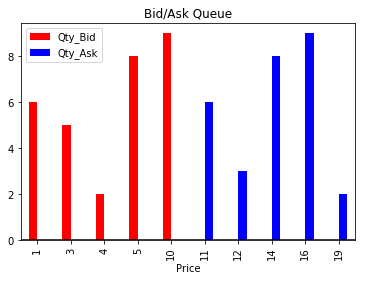

In [388]:
plot_order(buy_order1, sell_order1)

In [389]:
# Executing against orders(Crossing)

# Normal matching - Limit, balance unfilled at price

[buy_order1,sell_order1,summ(orderLBm),pro_order(buy_order1,sell_order1,orderLBm,'NM'),
 buy_order1,sell_order1,summ(orderLSm),pro_order(buy_order1,sell_order1,orderLSm,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'B', {102: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2, 102: 72},
  {},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  True],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'S', {98: 100}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2, 98: 100},
  {},
  {},
  True]]

In [390]:
# Normal matching - Limit, balance filled at price

[buy_order1,sell_order1,summ(orderLBmt),pro_order(buy_order1,sell_order1,orderLBmt,'NM'),
 buy_order1,sell_order1,summ(orderLSmt),pro_order(buy_order1,sell_order1,orderLSmt,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'B', {102: 40}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2, 102: 12},
  {},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  True],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['L', 'S', {98: 40}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2, 98: 40},
  {},
  {},
  True]]

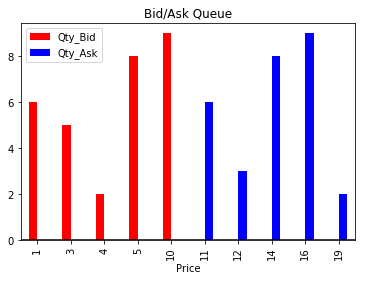

In [391]:
plot_order(buy_order1, sell_order1)

In [392]:
# Normal matching - Market, amount filled

[buy_order1,sell_order1,summ(orderMB),pro_order(buy_order1,sell_order1,orderMB,'NM'),
 buy_order1,sell_order1,summ(orderMS),pro_order(buy_order1,sell_order1,orderMS,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['M', 'B', {0: 65}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'B',
   'OrderType': 'M',
   'Price': 0,
   'Quantity': 37,
   'Trader': 1},
  False],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['M', 'S', {0: 65}],
 [{},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'S',
   'OrderType': 'M',
   'Price': 0,
   'Quantity': 35,
   'Trader': 1},
  False]]

In [393]:
# Normal matching - Market, amount unfilled

# Returns hanging trade and False

[buy_order1,sell_order1,summ(orderMBt),pro_order(buy_order1,sell_order1,orderMBt,'NM'),
 buy_order1,sell_order1,summ(orderMSt),pro_order(buy_order1,sell_order1,orderMSt,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['M', 'B', {0: 120}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'B',
   'OrderType': 'M',
   'Price': 0,
   'Quantity': 92,
   'Trader': 1},
  False],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['M', 'S', {0: 120}],
 [{},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'S',
   'OrderType': 'M',
   'Price': 0,
   'Quantity': 90,
   'Trader': 1},
  False]]

In [396]:
# Normal matching - Cancel, amount cancelled

[buy_order1,sell_order1,summ(orderCBT),pro_order(buy_order1,sell_order1,orderCBT,'NM'),
 buy_order1,sell_order1,summ(orderCST),pro_order(buy_order1,sell_order1,orderCST,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'B', {98: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'B',
   'OrderType': 'C',
   'Price': 98,
   'Quantity': 35,
   'Trader': 1},
  False],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'S', {103: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'S',
   'OrderType': 'C',
   'Price': 103,
   'Quantity': 35,
   'Trader': 1},
  False]]

In [401]:
# Normal matching - Cancel, amount greater than available

# Returns the stop order and False

[buy_order1,sell_order1,summ(orderCBF1),pro_order(buy_order1,sell_order1,orderCBF1,'NM'),
 buy_order1,sell_order1,summ(orderCST1),pro_order(buy_order1,sell_order1,orderCST1,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'B', {99: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'B',
   'OrderType': 'C',
   'Price': 99,
   'Quantity': 35,
   'Trader': 1},
  False],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'S', {102: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'S',
   'OrderType': 'C',
   'Price': 102,
   'Quantity': 35,
   'Trader': 1},
  False]]

In [403]:
# Normal matching - Cancel, no amount at price

# Returns the cancel order and False

[buy_order1,sell_order1,summ(orderCBF2),pro_order(buy_order1,sell_order1,orderCBF2,'NM'),
 buy_order1,sell_order1,summ(orderCST2),pro_order(buy_order1,sell_order1,orderCST2,'NM')]

[{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'B', {90: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'B',
   'OrderType': 'C',
   'Price': 90,
   'Quantity': 35,
   'Trader': 1},
  False],
 {1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
 {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
 ['C', 'S', {110: 35}],
 [{1: 6, 3: 5, 5: 8, 10: 9, 4: 2},
  {11: 6, 12: 3, 14: 8, 16: 9, 19: 2},
  {},
  {'Date': '2018-03-01',
   'OrderID': 1,
   'OrderCharacteristic': 1,
   'Direction': 'S',
   'OrderType': 'C',
   'Price': 110,
   'Quantity': 35,
   'Trader': 1},
  False]]